In [5]:
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv('/content/titanic-Dataset.csv')

In [7]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
indices=['Sex','Cabin','Embarked']
for i in indices:
  print(data[i].value_counts())

male      577
female    314
Name: Sex, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [10]:
data['Sex']=data['Sex'].map({'male':0, 'female':1})
data['Embarked']=data['Embarked'].map({'S':0, 'C':1,'Q':2})

In [12]:
data['Embarked'].isna().sum()

2

In [15]:
data['Embarked'].fillna(method='bfill',inplace=True)

In [17]:
data['Cabin'].isna().sum()

687

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[['Cabin']] = data[['Cabin']].astype(str)
data[['Cabin']] = data[['Cabin']].apply(le.fit_transform)

In [22]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,147,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,81,1.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [30]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [31]:
x=data.drop(columns=['PassengerId','Name','Ticket']).values
y=data['Survived'].values

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

## KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(x_train,y_train)

y_pred = KNN_model.predict(x_test)
y_pred_proba = KNN_model.predict_proba(x_test)

In [42]:
from sklearn import metrics

class_report = metrics.classification_report(y_test,y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       105
           1       0.78      0.64      0.70        74

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179



<Axes: >

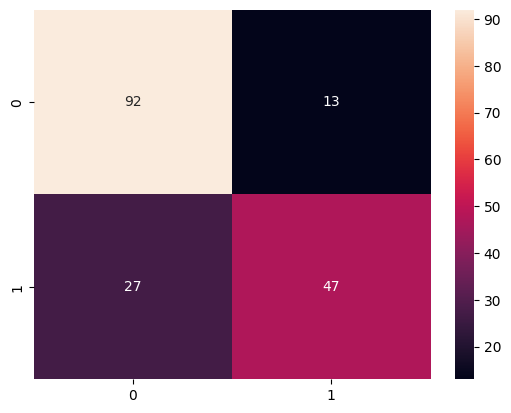

In [43]:
import seaborn as sns

conv_mat = metrics.confusion_matrix(y_test,y_pred)
conv_mat

sns.heatmap(conv_mat,annot=True)

In [44]:
accuracy = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'accuracy = {accuracy:0.2%}')
print(f'recall = {recall:0.2%}')
print(f'precision = {precision:0.2%}')
print(f'f1_score = {f1_score:0.2%}')

accuracy = 77.65%
recall = 63.51%
precision = 78.33%
f1_score = 70.15%


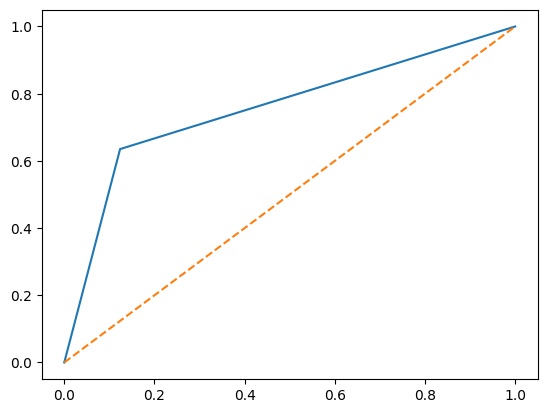

In [45]:
import matplotlib.pyplot as plt
fpr, tpr, tresholds = metrics.roc_curve(y_test,y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')

In [46]:
AUC = metrics.roc_auc_score(y_test,y_pred_proba[:,1])

print(f'AUC = {AUC:0.2%}')

AUC = 75.57%


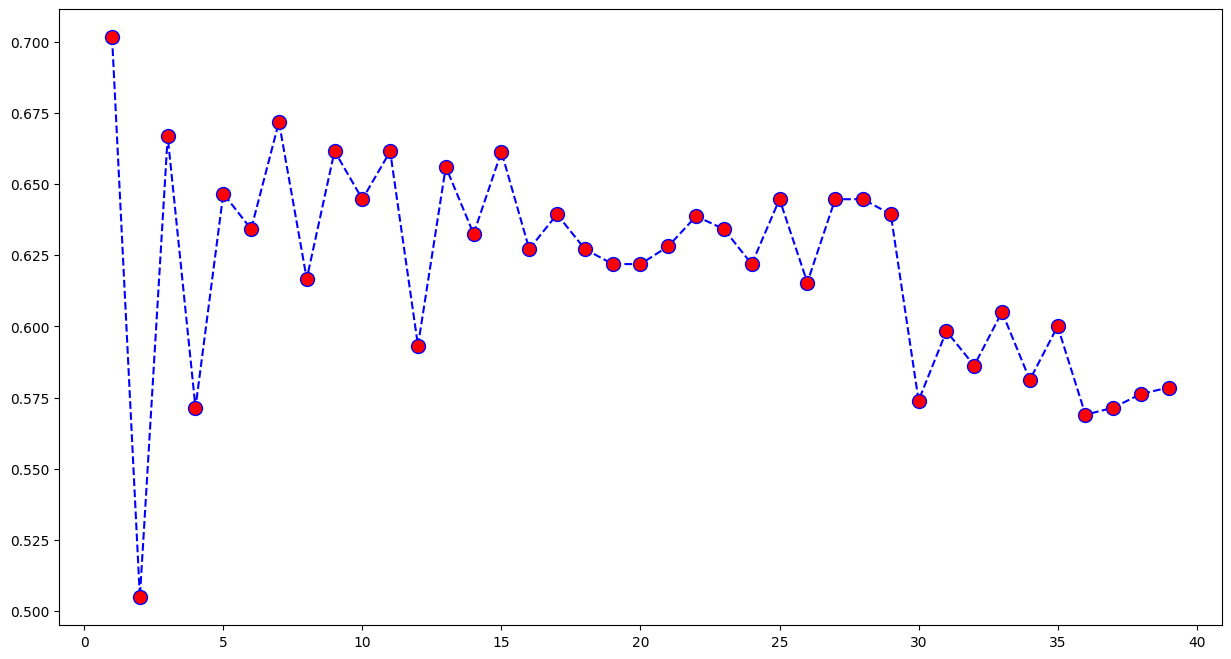

In [40]:
Errors = []

for i in range(1,40):
  KNN_model_temp = KNeighborsClassifier(n_neighbors=i)

  KNN_model_temp.fit(x_train,y_train)

  y_pred_temp = KNN_model_temp.predict(x_test)

  Errors.append(metrics.f1_score(y_test,y_pred_temp))

plt.figure(figsize=(15,8))

plt.plot(range(1,40),Errors,'bo--', markerfacecolor = 'red', markersize = '10' )


# SVM Algorithm

In [58]:
from sklearn.svm import SVC

SVM_model = SVC(kernel = 'linear',probability=True)

SVM_model.fit(x_train,y_train)

y_pred = SVM_model.predict(x_test)
y_pred_proba = SVM_model.predict_proba(x_test)

In [59]:
from sklearn import metrics

class_report = metrics.classification_report(y_test,y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



<Axes: >

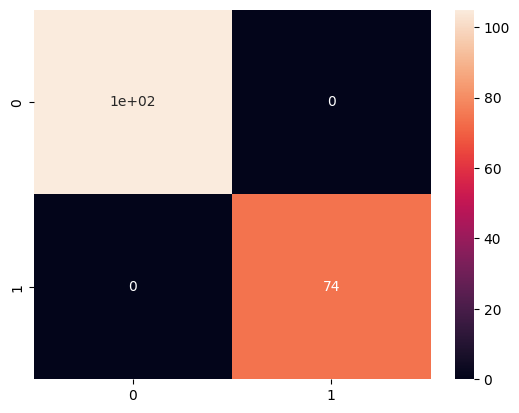

In [60]:
import seaborn as sns

conv_mat = metrics.confusion_matrix(y_test,y_pred)
conv_mat

sns.heatmap(conv_mat,annot=True)

In [61]:
accuracy = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'accuracy = {accuracy:0.2%}')
print(f'recall = {recall:0.2%}')
print(f'precision = {precision:0.2%}')
print(f'f1_score = {f1_score:0.2%}')

accuracy = 100.00%
recall = 100.00%
precision = 100.00%
f1_score = 100.00%


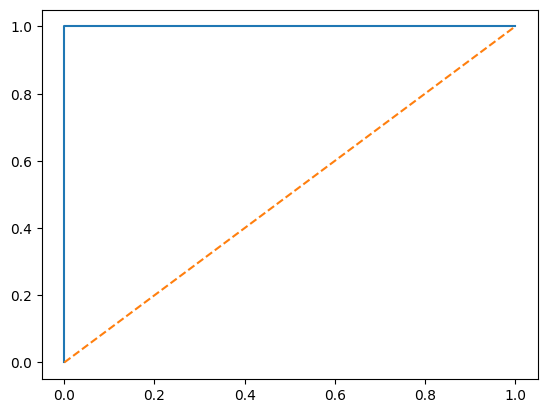

In [62]:
import matplotlib.pyplot as plt
fpr, tpr, tresholds = metrics.roc_curve(y_test,y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')

linear
poly
rbf
sigmoid


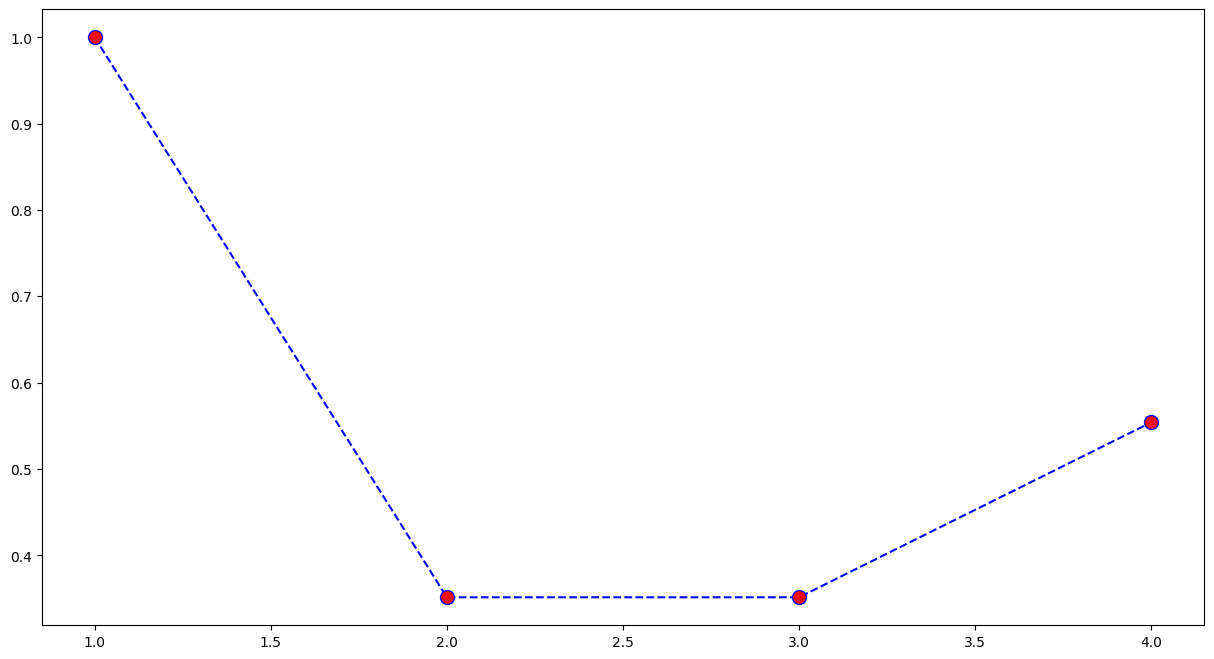

In [53]:
Errors = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  print(i)
  SVM_model_temp = SVC(kernel= i)

  SVM_model_temp.fit(x_train,y_train)

  y_pred_temp = SVM_model_temp.predict(x_test)

  Errors.append(metrics.recall_score(y_test,y_pred_temp))

plt.figure(figsize=(15,8))

plt.plot(range(1,5),Errors,'bo--', markerfacecolor = 'red', markersize = '10' )